In [1]:
#@title Cài đặt thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv('/content/fake_or_real_news.csv')

print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#@title Đếm label
labels = df.label.value_counts()
labels.head()

,count
label,
REAL,3171
FAKE,3164


<function matplotlib.pyplot.show(close=None, block=None)>

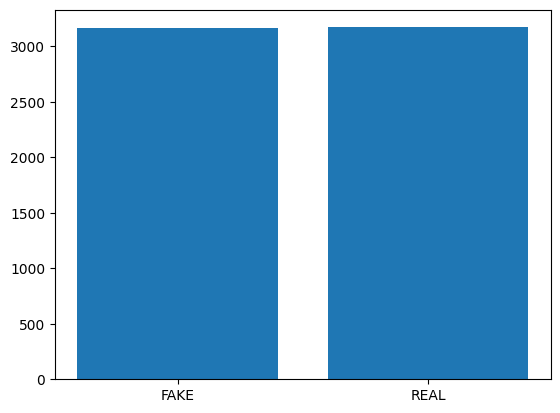

In [8]:
#@title Bảng phân bố label
x = ['FAKE','REAL']
y = [3164, 3171]
plt.bar(x, y)
plt.show

In [10]:
#@title Chia tập train và tập set
x_train,x_test,y_train,y_test=train_test_split(df['text'], df['label'], test_size=0.2, random_state=7)

In [11]:
#@title Khởi tạo TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [12]:
#@title Khởi tạo PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


In [13]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[589,  49],
       [ 43, 586]])

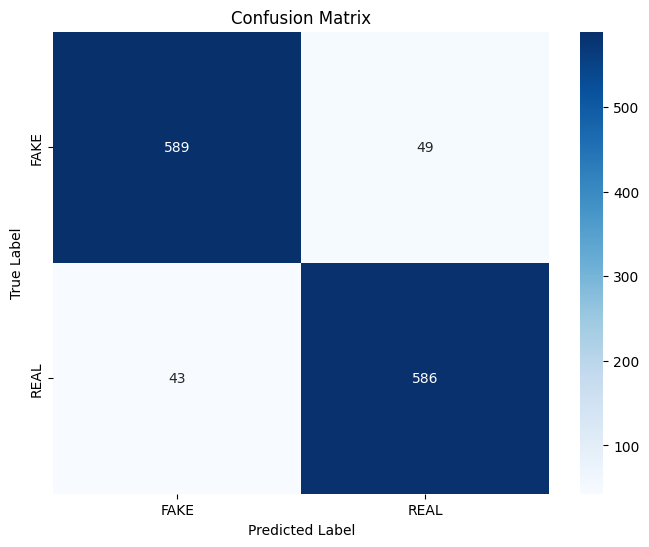

In [14]:
#@title Confusion matrix của mô hình dự đoán
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
#@title Kiểm tra prediction
new_text = ["The quick brown fox jumps over the lazy dog"]
new_text_tfidf = tfidf_vectorizer.transform(new_text)
prediction = pac.predict(new_text_tfidf)
print("Prediction:", prediction)

Prediction: ['FAKE']
